In [26]:
## HR Analytics


In [27]:
## Introduction

Human Resource (HR) Analytics is a strategic tool for modern organizations. With the rise of data-driven decision-making, understanding the factors influencing employee performance and HR decisions has become critical. This project explores these themes using the "HR Analytics Prediction" dataset, aiming to uncover trends and optimize HR strategies.

Why is this project important for a Data Analyst?
Mastery of data wrangling, exploratory analysis, and predictive modeling is essential for informed decision-making. This project highlights the following key stages:

Data Wrangling: Preparing and transforming raw data to ensure quality and reliability.
Exploratory Data Analysis (EDA): Identifying patterns and meaningful relationships within the data.
Prediction: Applying modeling techniques to forecast key HR outcomes.
Objectives of the Project
Identify key factors influencing employee retention and satisfaction.
Analyze trends in employee performance and behavior within organizations.
Provide actionable recommendations based on data to improve talent management and HR decision-making.
Dataset Description
This dataset contains information on employees across various professional contexts, including demographic, organizational, and behavioral variables.

Key Features:

Demographics: Age, gender, region, marital status.
Professional Information: Job role, department, years of experience, salary, performance evaluation.
Workplace Behaviors: Satisfaction, absenteeism rate, turnover rate, working hours.
Each variable plays a significant role in understanding and predicting employee behavior, guiding strategic HR decisions.

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [29]:
# Load the dataset
hr_analysis = pd.read_csv("/Users/dee_98/Desktop/Data Cleaning/HR-Employee-Attrition.csv")

In [30]:
pip install jinja2

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
hr_analysis.head().style.background_gradient(cmap='Blues')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### **1. Identifier et traiter les valeurs manquantes**

- **Vérifier les valeurs manquantes :**

In [32]:
hr_analysis.isnull().sum()
hr_analysis.isnull().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### **2. Identifier et supprimer les doublons**

- **Vérifier les doublons :**

In [33]:
hr_analysis.duplicated().sum()

np.int64(0)

In [34]:
hr_analysis.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [35]:
#Statistical Summary 


In [36]:
hr_analysis.describe().style.background_gradient(cmap='Greens')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [37]:
hr_analysis_numeric = hr_analysis.select_dtypes(include=['float64', 'int64'])

In [38]:
hr_analysis_numeric.corr(min_periods=4).style.background_gradient(cmap='Blues')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,nan,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,nan,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,nan,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,nan,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,nan,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,nan,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,nan,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,nan,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,nan,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,nan,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## Exploratory Data Analysis (EDA)

* Demographic Analysis

    - Age Distribution:
    - Objective: Visualize and analyze the age patterns within the workforce to understand the distribution of employees across different age groups.
    - Visualization: A histogram with a Kernel Density Estimate (KDE) to show the frequency of employees in various age brackets.

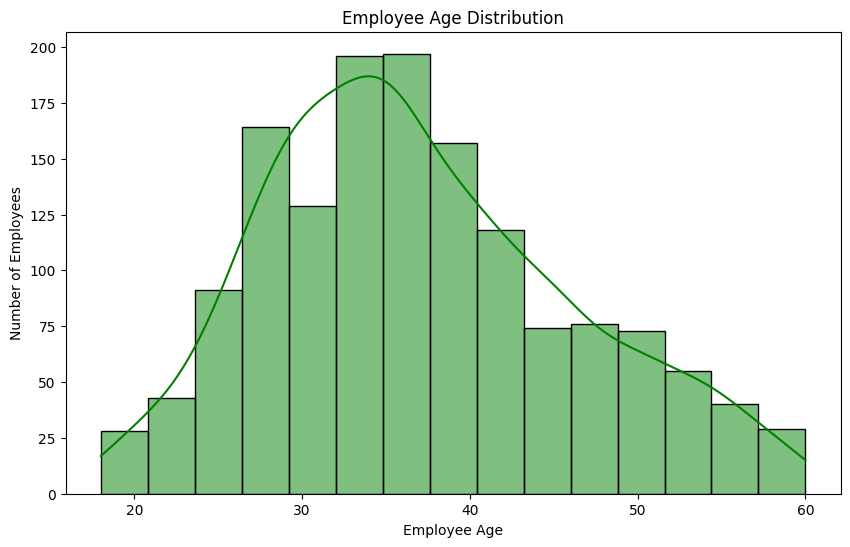

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(hr_analysis['Age'],bins=15,kde=True,color='green')
plt.title('Employee Age Distribution')
plt.xlabel('Employee Age')
plt.ylabel('Number of Employees')
plt.show()


* Gender and Department Distribution:

    - Objective: Break down the workforce by gender and job departments to identify any gender disparities or departmental concentrations.

    - Visualization: A bar chart or pie chart showing the distribution of employees by gender and department.


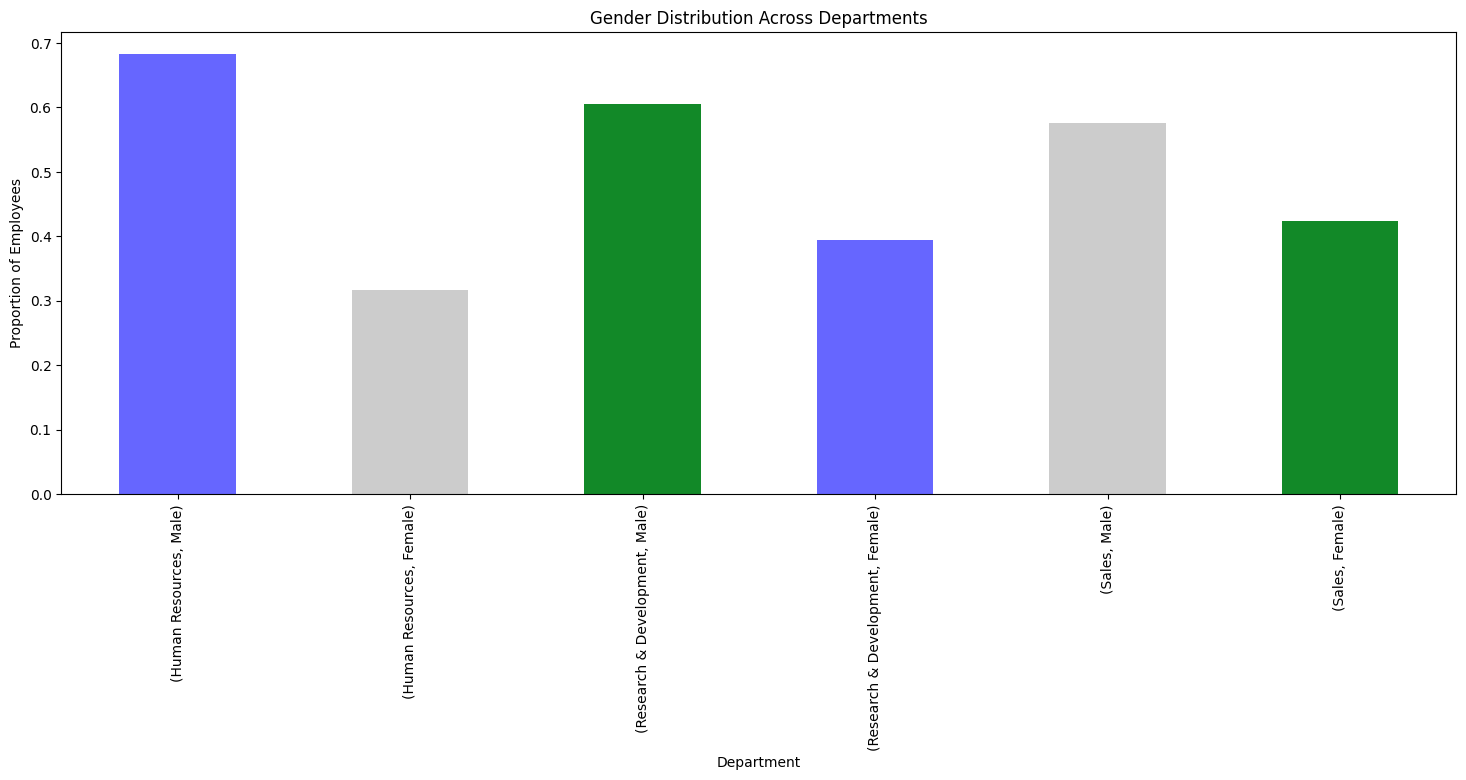

In [41]:
report_genre_dept = hr_analysis.groupby('Department')['Gender'].value_counts(normalize=True)

report_genre_dept.plot(kind='bar', stacked=True, figsize=(18,6), color=['#6666FF', '#CCCCCC', '#128928'])

plt.title('Gender Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')
plt.show()

# Attrition Analysis


* Attrition Rate by Category:

    - Objective: Analyze the monthly income distribution across different departments to understand if income disparities exist.
    - Visualization: A box plot to show the distribution of monthly income by department.


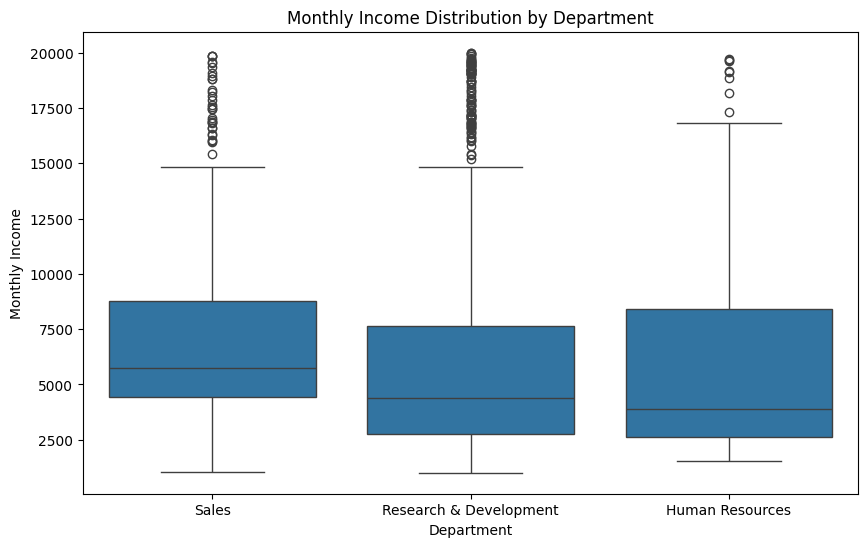

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='MonthlyIncome', data=hr_analysis)
plt.title("Monthly Income Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Monthly Income")
plt.show()


## Performance and Satisfaction Analysis

* Correlation Between Satisfaction and Performance:

    - Objective: Explore the relationship between total working years and monthly income to understand if experience correlates with higher income.

    - Visualization: A scatter plot to show the relationship between total working years and monthly income.



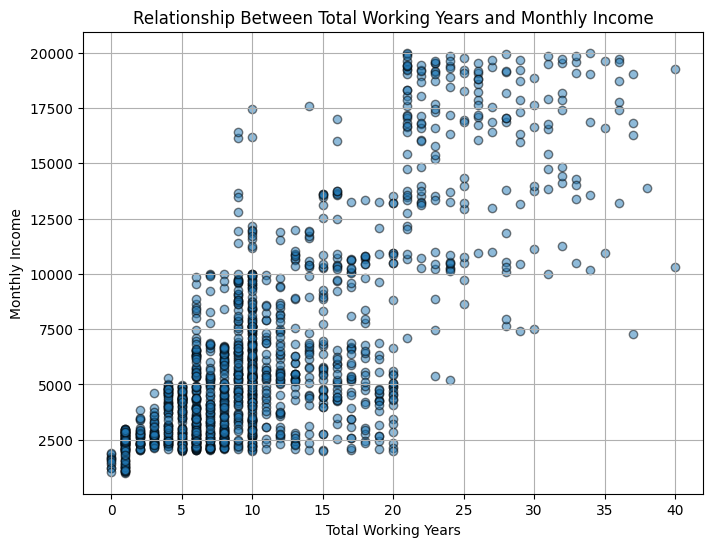

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(hr_analysis["TotalWorkingYears"],hr_analysis["MonthlyIncome"],alpha=0.5,edgecolors='k')
plt.title("Relationship Between Total Working Years and Monthly Income")
plt.xlabel("Total Working Years")
plt.ylabel("Monthly Income")
plt.grid(True)
plt.show()


# Job Satisfaction Analysis


* Average Job Satisfaction by Department:
    - Objective: Analyze the average job satisfaction levels across different departments.
    - Visualization: A bar plot to show the average job satisfaction by department.



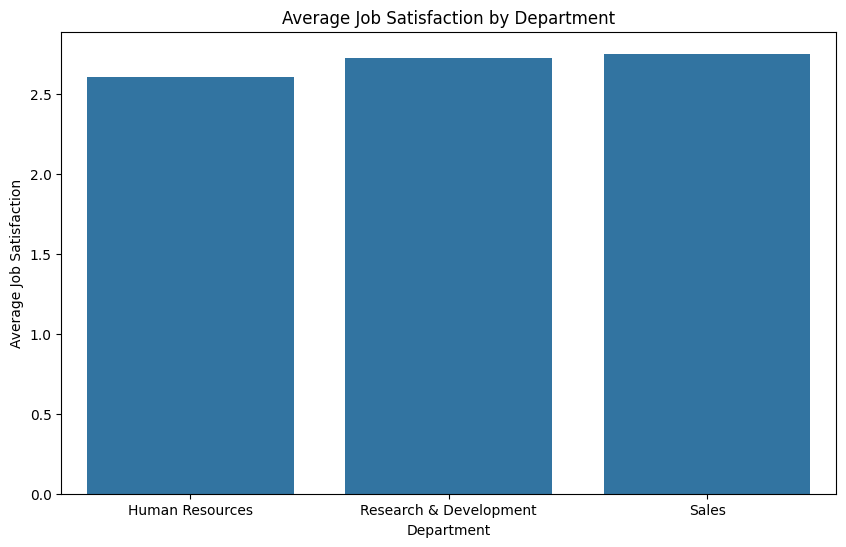

In [ ]:
# Agréger la satisfaction par département
job_satisfaction_mean = hr_analysis.groupby('Department')['JobSatisfaction'].mean().reset_index()

# Tracer le barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='JobSatisfaction', data=job_satisfaction_mean, ci=None)

# Titres et labels
plt.title("Average Job Satisfaction by Department")
plt.xlabel("Department")
plt.ylabel("Average Job Satisfaction")
plt.show()


# Income Analysis

* Monthly Income Distribution:
    - Objective: Visualize the distribution of monthly income across the workforce.
    - Visualization: A histogram to show the distribution of monthly income.



# Monthly Income by Education Level:

- Objective: Analyze the average monthly income by education level to understand if higher education correlates with higher income.

- Visualization: A bar plot to show the average monthly income by education level.

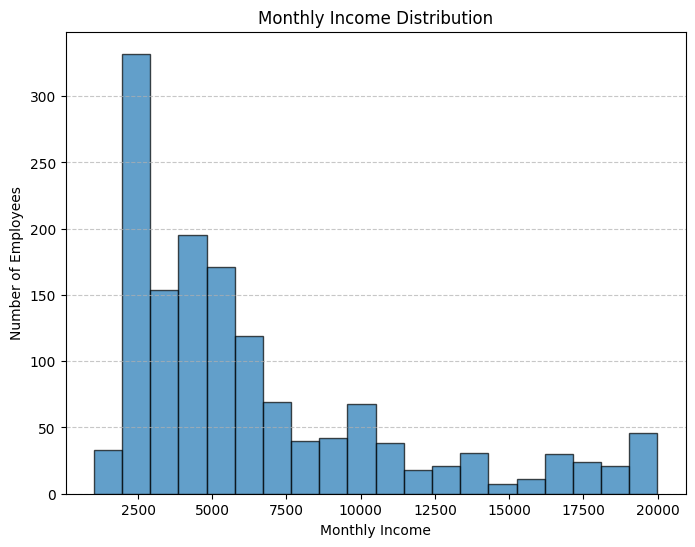

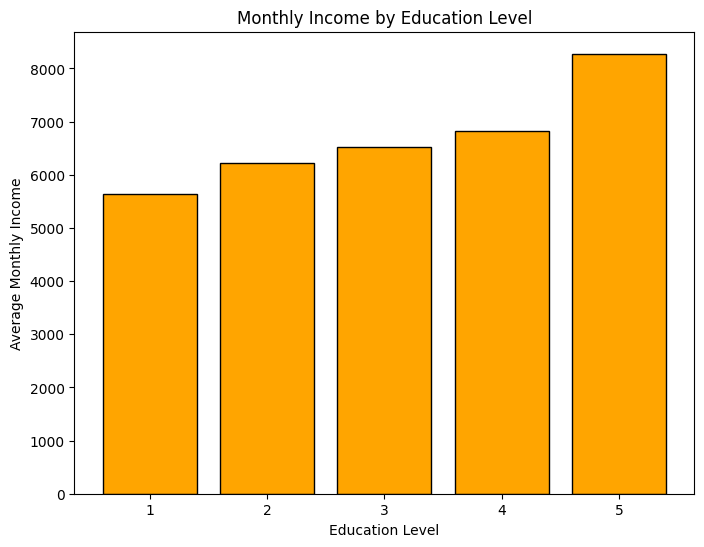

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(hr_analysis['MonthlyIncome'], bins=20, edgecolor='black', alpha=0.7)

plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


education_income = hr_analysis.groupby('Education')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(education_income['Education'], education_income['MonthlyIncome'], color='orange', edgecolor='black')
plt.title("Monthly Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Monthly Income")
plt.show()



# Promotion and Tenure Analysis


* Years Since Last Promotion vs Attrition:
   - Objective: Analyze the relationship between the number of years since the last promotion and attrition.
   - Visualization: A heatmap to show the relationship between years since last promotion and attrition.

<function matplotlib.pyplot.show(close=None, block=None)>

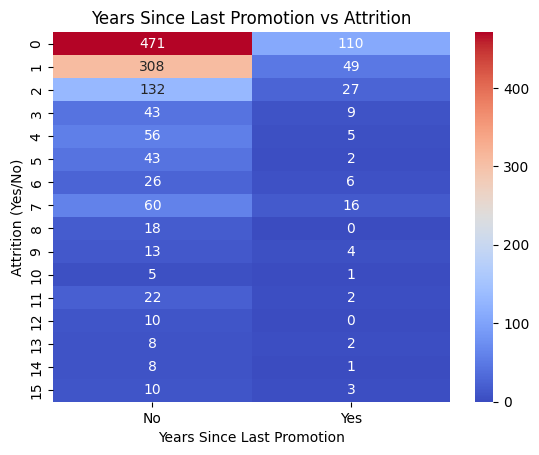

In [ ]:
activity_balance_crosstab=pd.crosstab(hr_analysis['YearsSinceLastPromotion'],hr_analysis['Attrition'])

sns.heatmap(activity_balance_crosstab,annot=True,cmap='coolwarm',fmt='d')
plt.title("Years Since Last Promotion vs Attrition")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Attrition (Yes/No)")
plt.show

# Distribution by Gender and Years Since Last Promotion


- Objective: Analyze the distribution of employees by gender and the number of years since their last promotion.

- Visualization: A stacked bar chart showing the distribution of genders based on the years since the last promotion.



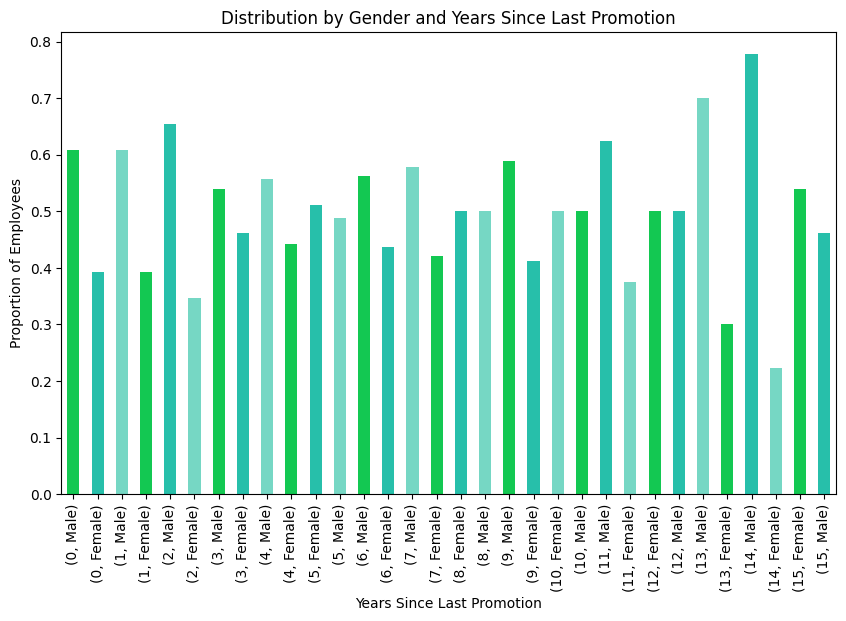

In [50]:
report_genre_promo = hr_analysis.groupby('YearsSinceLastPromotion')['Gender'].value_counts(normalize=True)

report_genre_promo.plot(kind='bar', stacked=True, figsize=(10,6), color=['#13c852', '#27bfaa', '#76d7c4'])

plt.title("Distribution by Gender and Years Since Last Promotion")
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Proportion of Employees')
plt.show()

YearsSinceLastPromotion           0      1     2     3     4     5     6   \
Department             Gender                                               
Human Resources        Female    7.0    6.0   3.0   1.0   1.0   2.0   0.0   
                       Male     17.0   11.0   5.0   2.0   2.0   1.0   0.0   
Research & Development Female  145.0   91.0  35.0  18.0  18.0  14.0   9.0   
                       Male    234.0  152.0  68.0  19.0  21.0  12.0  12.0   
Sales                  Female   76.0   43.0  17.0   5.0   8.0   7.0   5.0   
                       Male    102.0   54.0  31.0   7.0  11.0   9.0   6.0   

YearsSinceLastPromotion          7    8    9    10   11   12   13   14   15  
Department             Gender                                                
Human Resources        Female   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
                       Male     3.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
Research & Development Female  19.0  8.0  4.0  2.0  5.0  4.0  1.0  2.0 

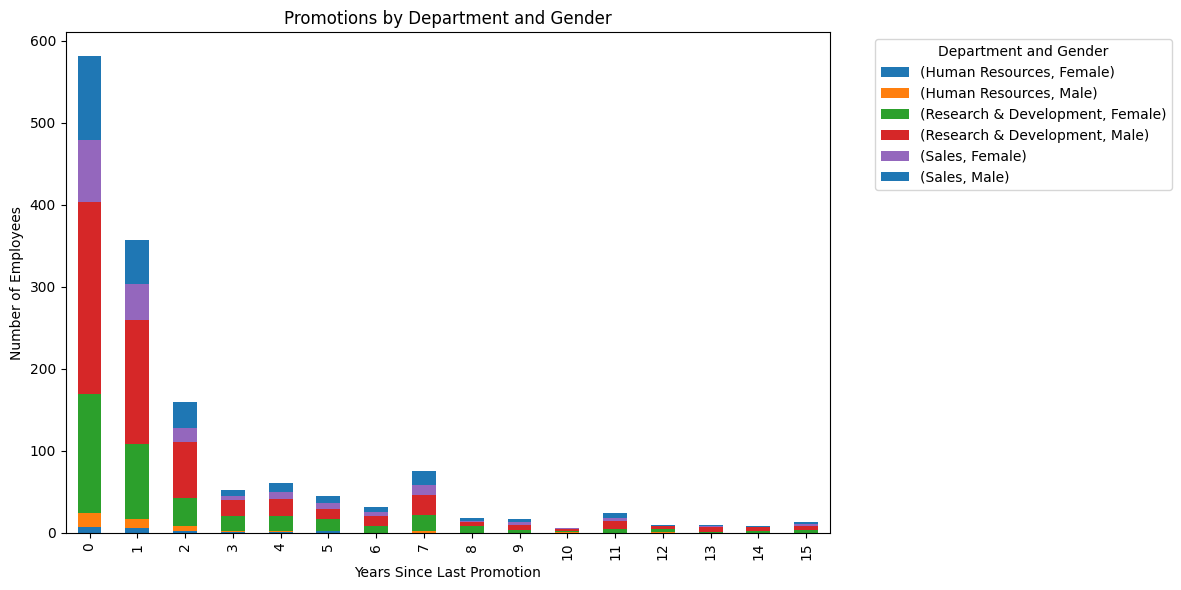

In [52]:
# Aggregate data by Department, Gender, and Years Since Last Promotion
promotion_data = hr_analysis.groupby(['Department', 'Gender'])['YearsSinceLastPromotion'].value_counts().unstack().fillna(0)

# Verify the data
print(promotion_data)

# Plot a stacked bar chart
promotion_data.T.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Titles and labels
plt.title("Promotions by Department and Gender")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")
plt.legend(title="Department and Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()